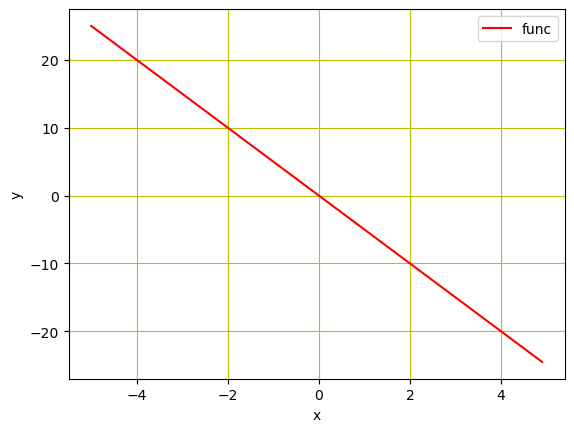

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt


# Creating a function f(X) with a slope of -5
X = torch.arange(-5, 5, 0.1).view(-1, 1)
func = -5 * X

# Plot the line in red with grids
plt.plot(X.numpy(), func.numpy(), 'r', label='func')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('True', color='y')
plt.show()

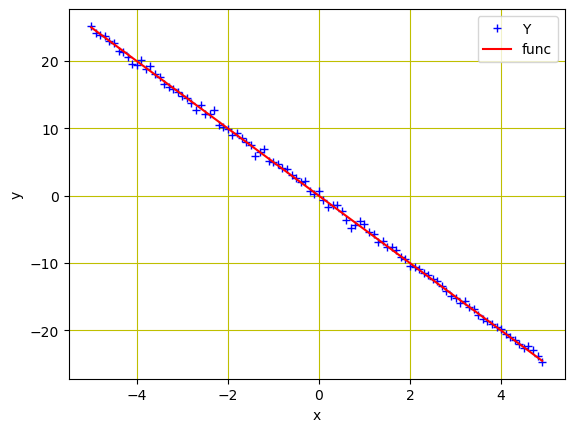

In [2]:
# Adding Gaussian noise to the function f(X) and saving it in Y
Y = func + 0.4 * torch.randn(X.size())

# Plot and visualizing the data points in blue
plt.plot(X.numpy(), Y.numpy(), 'b+', label='Y')
plt.plot(X.numpy(), func.numpy(), 'r', label='func')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('True', color='y')
plt.show()

### Build model

0,	210.16461181640625,	-1.6326265335083008
1,	93.59302520751953,	-7.2136640548706055
2,	41.731632232666016,	-3.491112232208252
3,	18.659069061279297,	-5.974054336547852
4,	8.394347190856934,	-4.317931652069092
5,	3.8276827335357666,	-5.422565460205078
6,	1.7960219383239746,	-4.685774803161621
7,	0.892159640789032,	-5.1772141456604
8,	0.4900408685207367,	-4.849424362182617
9,	0.31114232540130615,	-5.068059921264648
10,	0.23155273497104645,	-4.922230243682861
11,	0.19614410400390625,	-5.019498348236084
12,	0.1803913116455078,	-4.954620838165283
13,	0.17338304221630096,	-4.997893810272217
14,	0.17026518285274506,	-4.969030857086182
15,	0.16887813806533813,	-4.988282680511475
16,	0.1682610660791397,	-4.9754414558410645
17,	0.16798652708530426,	-4.984006404876709
18,	0.16786432266235352,	-4.9782938957214355
19,	0.16780996322631836,	-4.9821038246154785


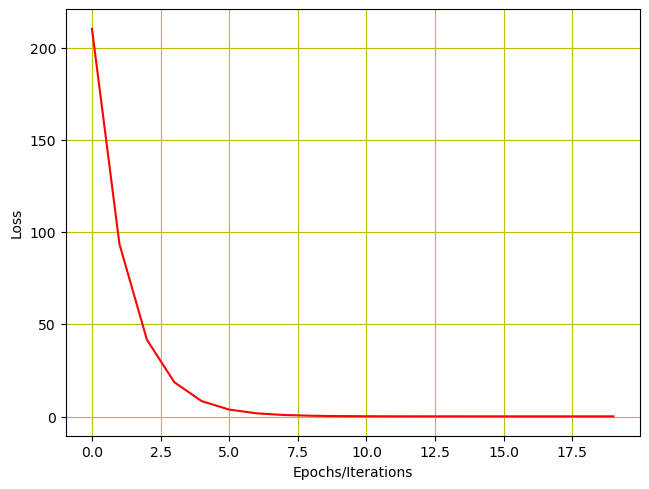

In [3]:
w = torch.tensor(-10.0, requires_grad=True)

# defining the function for forward pass for prediction
def forward(x):
    return w * x

# evaluating data points with Mean Square Error
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)


step_size = 0.1
loss_list = []
iter = 20
 
for i in range (iter):
    # making predictions with forward pass
    Y_pred = forward(X)
    # calculating the loss between original and predicted data points
    loss = criterion(Y_pred, Y)
    # storing the calculated loss in a list
    loss_list.append(loss.item())
    # backward pass for computing the gradients of the loss w.r.t to learnable parameters
    loss.backward()
    # updateing the parameters after each iteration
    w.data = w.data - step_size * w.grad.data
    # zeroing gradients after each iteration
    w.grad.data.zero_()
    # priting the values for understanding
    print('{},\t{},\t{}'.format(i, loss.item(), w.item()))
 
# Plotting the loss after each iteration
plt.plot(loss_list, 'r')
plt.tight_layout()
plt.grid('True', color='y')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()

### Training the Model for Two Parameters

0, 	599.35693359375, 	-1.8516674041748047, 	-16.049381256103516
1, 	345.1231384277344, 	-7.247099876403809, 	-12.807402610778809
2, 	203.8091583251953, 	-3.615926504135132, 	-10.267773628234863
3, 	122.88583374023438, 	-6.0125226974487305, 	-8.199758529663086
4, 	75.32806396484375, 	-4.393312931060791, 	-6.569313049316406
5, 	46.77352523803711, 	-5.457021236419678, 	-5.248764514923096
6, 	29.335447311401367, 	-4.734322547912598, 	-4.202962875366211
7, 	18.546937942504883, 	-5.205904483795166, 	-3.3590943813323975
8, 	11.807430267333984, 	-4.882920742034912, 	-2.6887154579162598
9, 	7.5674147605896, 	-5.091647148132324, 	-2.1491825580596924
10, 	4.886275768280029, 	-4.947031021118164, 	-1.7196433544158936
11, 	3.184706449508667, 	-5.039194583892822, 	-1.374565839767456
12, 	2.1020376682281494, 	-4.974270820617676, 	-1.0994255542755127
13, 	1.4119142293930054, 	-5.0148234367370605, 	-0.878663957118988
14, 	0.9714502096176147, 	-4.985567569732666, 	-0.7024602293968201
15, 	0.6900792121887

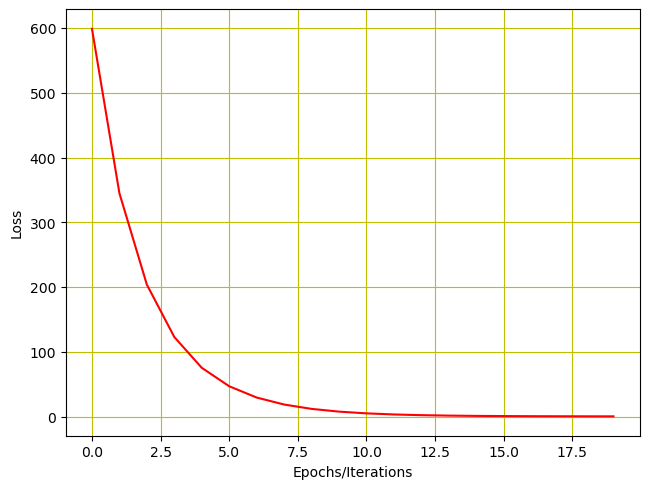

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt

X = torch.arange(-5, 5, 0.1).view(-1, 1)
func = -5 * X
Y = func + 0.4 * torch.randn(X.size())

# defining the function for forward pass for prediction
def forward(x):
    return w * x + b

# evaluating data points with Mean Square Error.
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

w = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-20.0, requires_grad=True)

step_size = 0.1
loss_list = []
iter = 20

for i in range (iter):    
    # making predictions with forward pass
    Y_pred = forward(X)
    # calculating the loss between original and predicted data points
    loss = criterion(Y_pred, Y)
    # storing the calculated loss in a list
    loss_list.append(loss.item())
    # backward pass for computing the gradients of the loss w.r.t to learnable parameters
    loss.backward()
    # updateing the parameters after each iteration
    w.data = w.data - step_size * w.grad.data
    b.data = b.data - step_size * b.grad.data
    # zeroing gradients after each iteration
    w.grad.data.zero_()
    b.grad.data.zero_()
    # priting the values for understanding
    print('{}, \t{}, \t{}, \t{}'.format(i, loss.item(), w.item(), b.item()))

# Plotting the loss after each iteration
plt.plot(loss_list, 'r')
plt.tight_layout()
plt.grid('True', color='y')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()